### Імпорт бібліотек

In [10]:
import random
import networkx as nx
import matplotlib
matplotlib.use("Agg") 
import matplotlib.pyplot as plt
from IPython.display import Image, display


### Клас для створення графа

In [19]:
class Create_Graph:
    def __init__(self, n, remove_edges):
        self.n = n
        self.remove_edges = remove_edges
        self.graph = None
        self.generate_graph()

    def generate_graph(self):
        self.graph = nx.grid_2d_graph(self.n, self.n)
        edges = list(self.graph.edges())
        random.shuffle(edges)

        removed = 0
        for u, v in edges:
            if removed >= self.remove_edges:
                break
            self.graph.remove_edge(u, v)
            if not nx.is_connected(self.graph):
                self.graph.add_edge(u, v)
            else:
                removed += 1
        return self.graph

    def visualization(self, filename="graph.png"):
        pos = {node: (node[1], -node[0]) for node in self.graph.nodes()}
        plt.figure(figsize=(6, 6))
        nx.draw(self.graph, pos, node_color="white", edgecolors="black", node_size=200)
        plt.axis("off")
        plt.savefig(filename, bbox_inches="tight", dpi=150)
        plt.close()
        return filename


### Створення об’єкта графа

In [22]:
graph = Create_Graph(5, 13)
graph.visualization()

'graph.png'

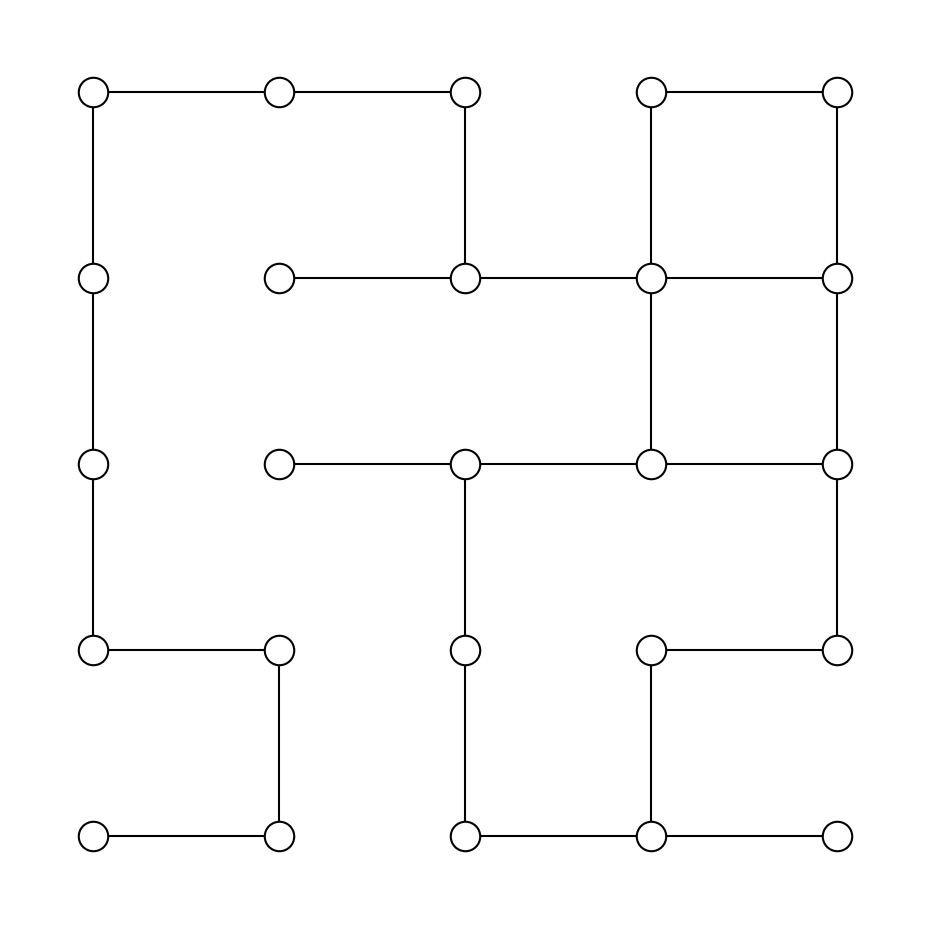

In [23]:
image_path = graph.visualization("graph.png")
display(Image(filename=image_path))